In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv


In [2]:
# Hi and welcome to my notebook 
# please support this work by voting and sharing with enthusiasts 
# happy machine learning :)

In [3]:
# import required libraries and packages for machine learning and data scince!
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# read in the data as a csv file 
df = pd.read_csv("/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv")

# print the shape of the dataset
print("Shape of the dataset:",df.shape)

# print the details about the dataset (info)
print("number of samples in the dataset:",df.shape[0])
print("number of columns in the dataset:",df.shape[1])

# the type of the dataset 
print("dtype of the dataset:\n",df.dtypes)

Shape of the dataset: (30, 3)
number of samples in the dataset: 30
number of columns in the dataset: 3
dtype of the dataset:
 Unnamed: 0           int64
YearsExperience    float64
Salary             float64
dtype: object


In [28]:
# show the first 5 rows of the dataset
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [29]:
# show the information about data frame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [31]:
# checking if there any null or Nan values 
print(df.isnull().all())
print("#"*10)
print(df.isna().all())

Unnamed: 0         False
YearsExperience    False
Salary             False
dtype: bool
##########
Unnamed: 0         False
YearsExperience    False
Salary             False
dtype: bool


In [32]:
# splitting the features and labels (ins and outs)
X = df["YearsExperience"]
y = df["Salary"]

In [33]:
# checking the length of the pandas series are the same!
print(len(X)==len(y))

True


In [34]:
# convert the pandas series into numpy arrays 
X = np.array(X)
y = np.array(y)

In [35]:
# cheking the shape of X and y
print("Data matrix shape:",X.shape)
print("Labels array shape:",y.shape)

Data matrix shape: (30,)
Labels array shape: (30,)


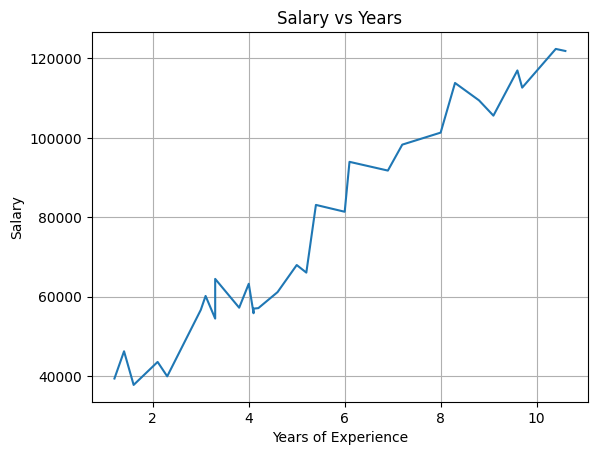

In [36]:
# lets vidualize the data to spot any hidden relation
plt.plot(X,y)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Years")
plt.grid("True")
plt.show()

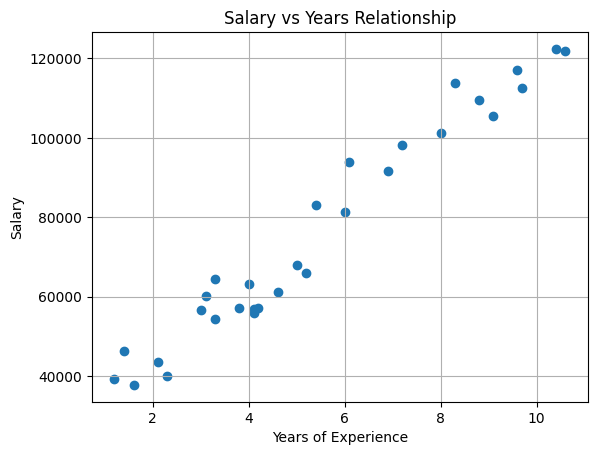

In [39]:
# lets vidualize it also using scatter plot
plt.scatter(X,y)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Years Relationship")
plt.grid("True")
plt.show()

# ****seems like there is a clear straightforward linear relationship aha!****

In [40]:
# ok lets divide the data into training and testing sets for ML Mechanics
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=12,shuffle=True)
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (24,)
X_test shape: (6,)
y_train shape: (24,)
y_test shape: (6,)


In [46]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()

linear_regressor.fit(X_train.reshape(-1,1),y_train)

LinearRegression()

In [52]:
# lets see the coefficients and intercept values 
print("value of w = ",np.squeeze(linear_regressor.coef_))
print("value of b = ",linear_regressor.intercept_)

value of w =  9509.996327102477
value of b =  24293.603518965974


In [53]:
r2_train = linear_regressor.score(X_train.reshape(-1,1),y_train)
r2_test = linear_regressor.score(X_test.reshape(-1,1),y_test)
print("R2 score on the training dataset:",r2_train)
print("R2 score on the testing dataset:",r2_test)

R2 score on the training dataset: 0.9587416260851391
R2 score on the testing dataset: 0.9429269163491424


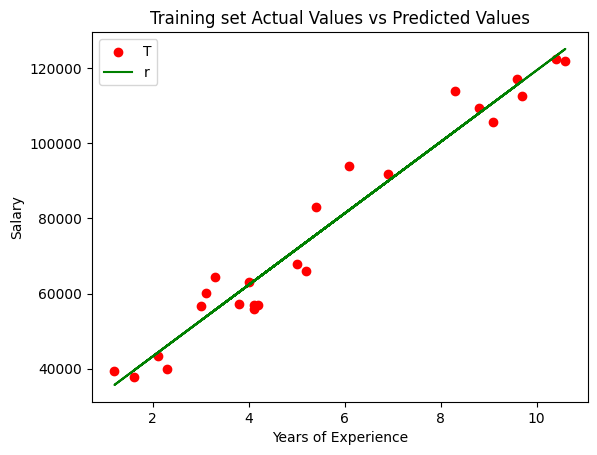

In [57]:
# lets visualize how accurate our model is on the training dataset
y_train_pred = linear_regressor.predict(X_train.reshape(-1,1))
plt.scatter(X_train,y_train,label="true values",color="red")
plt.plot(X_train,y_train_pred,label="predicted values",color="green")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Training set Actual Values vs Predicted Values")
plt.legend("True")
plt.show()

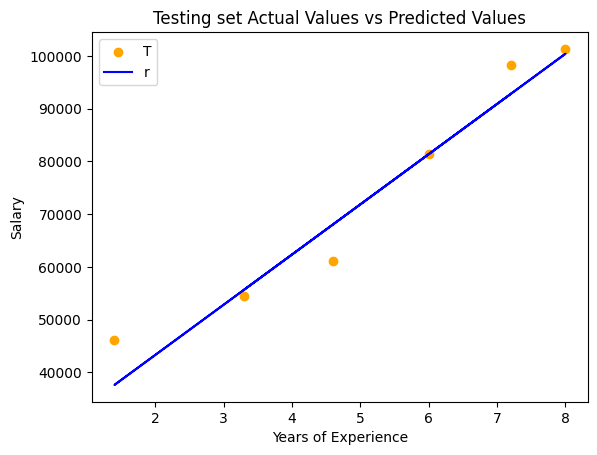

In [62]:
# lets visualize how accurate our model is on the testing dataset
y_test_pred = linear_regressor.predict(X_test.reshape(-1,1))
plt.scatter(X_test,y_test,label="true",color="orange")
plt.plot(X_test,y_test_pred,label="predicted",color="blue")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Testing set Actual Values vs Predicted Values")
plt.legend("True")
plt.show()

In [75]:
# ok now lets build our own function and make an interactive program 

model_params = {"w":linear_regressor.coef_[0],"b":linear_regressor.intercept_}

def my_model(x: float) -> float:
    """
    this function calculates the salary based on the experience of work
    
    Args:
        x (float64): the given years of experience for an employee
    
    Returns:
        y (float64): the estimated salary!
    """
    
    y_pred = model_params["w"] * x + model_params["b"]
    
    return y_pred


# lets build a mini program for estimating the salary given experience 
def program():
    print("Hello and Welcome to interactive program!")
    print("All you have to do is to set the years of exp\ni will tell you how much money you make!")
    ans = input("Are you ready to try me! (yes or no)").strip().lower()
    n = 0 # number of trails 
    while ans.lower() == "yes":
        exps = float(input("Enter years of expericence like 2.5 - 10.4"))
        out = my_model(exps)
        print("based on your level of expertise, your current salary would be:")
        print(f"{out:.3f}$")
        ans = input("Do you still want to try others: (yes or no)").strip().lower()
        n += 1
    print("End of program: you have used my program ",n,"times")
    print("Bye Bye!")
    
if __name__ == "__main__":
    program()

Hello and Welcome to interactive program!
All you have to do is to set the years of exp
i will tell you how much money you make!


Are you ready to try me! (yes or no) yes   
Enter years of expericence like 2.5 - 10.4 12


based on your level of expertise, your current salary would be:
138413.559$


Do you still want to try others: (yes or no) yes 
Enter years of expericence like 2.5 - 10.4 99


based on your level of expertise, your current salary would be:
965783.240$


Do you still want to try others: (yes or no) no


End of program: you have used my program  2 times
Bye Bye!


# **Thats was the end of my notebook! See ya in another one**
# ***Happy Coding***

# ***Thanks for watching :) Kidding I hope you find my notebook helpful!***